<a href="https://colab.research.google.com/github/amoghgadagi/Kaggle_Notebooks/blob/main/Transfer%2Blearning%2BPyTorch%2BANTS%2BBEES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip3 install torch torchvision

In [2]:
from torchvision import datasets, transforms, models
import torch
import numpy as np
import torch.nn.functional as F
from torch import nn
import matplotlib.pyplot as plt

In [3]:
!git clone https://github.com/jaddoescad/ants_and_bees.git

Cloning into 'ants_and_bees'...
remote: Enumerating objects: 408, done.
remote: Total 408 (delta 0), reused 0 (delta 0), pack-reused 408
Receiving objects: 100% (408/408), 45.03 MiB | 28.03 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [4]:
!ls

ants_and_bees  sample_data


In [5]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


In [6]:
!ls ants_and_bees/train/ants

 0013035.jpg		     408393566_b5b694119b.jpg
 1030023514_aad5c608f9.jpg   424119020_6d57481dab.jpg
 1095476100_3906d8afde.jpg   424873399_47658a91fb.jpg
 1099452230_d1949d3250.jpg   450057712_771b3bfc91.jpg
 116570827_e9c126745d.jpg    45472593_bfd624f8dc.jpg
 1225872729_6f0856588f.jpg   459694881_ac657d3187.jpg
 1262877379_64fcada201.jpg   460372577_f2f6a8c9fc.jpg
 1269756697_0bce92cdab.jpg   460874319_0a45ab4d05.jpg
 1286984635_5119e80de1.jpg   466430434_4000737de9.jpg
 132478121_2a430adea2.jpg    470127037_513711fd21.jpg
 1360291657_dc248c5eea.jpg   474806473_ca6caab245.jpg
 1368913450_e146e2fb6d.jpg   475961153_b8c13fd405.jpg
 1473187633_63ccaacea6.jpg   484293231_e53cfc0c89.jpg
 148715752_302c84f5a4.jpg    49375974_e28ba6f17e.jpg
 1489674356_09d48dde0a.jpg   506249802_207cd979b4.jpg
 149244013_c529578289.jpg    506249836_717b73f540.jpg
 150801003_3390b73135.jpg    512164029_c0a66b8498.jpg
 150801171_cd86f17ed8.jpg    512863248_43c8ce579b.jpg
 154124431_65460430f2.jpg    518773929_7

In [7]:
from torchvision.transforms.transforms import Normalize
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 20
transform_train = transforms.Compose([transforms.Resize(IMAGE_SIZE),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomRotation(10),
                                      transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
                                      transforms.ColorJitter(brightness=0.95, contrast=0.2, saturation=0.2),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                ])
                      
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Resize(IMAGE_SIZE),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

training_dataset= datasets.ImageFolder('ants_and_bees/train', transform=transform_train)
validation_dataset= datasets.ImageFolder('ants_and_bees/val', transform=transform)

train_data = torch.utils.data.DataLoader(dataset = training_dataset, batch_size= BATCH_SIZE, shuffle =True)
validation_data = torch.utils.data.DataLoader(dataset = validation_dataset, batch_size= BATCH_SIZE, shuffle =True)

In [8]:
len(training_dataset), len(validation_dataset)

(244, 153)

In [9]:
classes = ['ant', 'bee']

In [10]:
def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

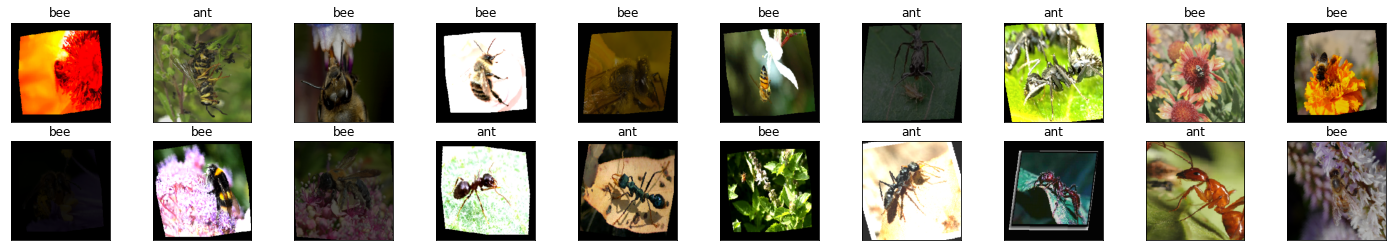

In [11]:
dataiter = iter(train_data)
images, labels = dataiter.next()
images_study = images
fig = plt.figure(figsize = (25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title(classes[labels[idx].item()])

In [12]:
model = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [13]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [14]:
for param in model.features.parameters():
  param.requires_grad=False

In [15]:
import torch.nn as nn

In [16]:
n_inputs = model.classifier[6].in_features
last_layer = nn.Linear(n_inputs, len(classes))
model.classifier[6] = last_layer

In [17]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [18]:
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= 0.0001)

In [20]:

epochs = 10
running_loss_history = []
running_accuracy_history = []
validation_running_loss_history = []
validation_running_accuracy_history = []

for e in range(epochs):
  running_loss=0.
  running_accuracy = 0.
  validation_running_loss = 0.
  validation_running_accuracy = 0.
  for inputs, labels in train_data:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)
    running_loss +=loss.item()
    running_accuracy +=torch.sum(preds == labels.data)

  else:

    with torch.no_grad():
      for val_inputs, val_labels in validation_data:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)

        _, val_preds = torch.max(val_outputs, 1)
        validation_running_loss +=val_loss.item()
        validation_running_accuracy += torch.sum(val_preds == val_labels.data)

    epoch_loss = running_loss/len(train_data.dataset)
    epoch_accuracy = running_accuracy.float()/len(train_data.dataset)
    running_loss_history.append(epoch_loss)
    running_accuracy_history.append(epoch_accuracy.cpu().detach().numpy())

    val_epoch_loss = validation_running_loss/len(validation_data.dataset)
    val_epoch_accuracy = validation_running_accuracy/len(validation_data.dataset)
    validation_running_loss_history.append(val_epoch_loss)
    validation_running_accuracy_history.append(val_epoch_accuracy.cpu().detach().numpy())

    print('epoch :', (e+1))
    print('training loss: {:.4f}, accuracy: {:.4f} '.format(epoch_loss, epoch_accuracy.item()))
    print('validation loss: {:.4f}, validation accuracy: {:.4f} '.format(val_epoch_loss, val_epoch_accuracy.item()))

epoch : 1
training loss: 0.0315, accuracy: 0.6516 
validation loss: 0.0220, validation accuracy: 0.8431 
epoch : 2
training loss: 0.0273, accuracy: 0.7541 
validation loss: 0.0185, validation accuracy: 0.8693 
epoch : 3
training loss: 0.0187, accuracy: 0.8484 
validation loss: 0.0184, validation accuracy: 0.8627 
epoch : 4
training loss: 0.0138, accuracy: 0.8811 
validation loss: 0.0166, validation accuracy: 0.8889 
epoch : 5
training loss: 0.0123, accuracy: 0.9180 
validation loss: 0.0160, validation accuracy: 0.8954 
epoch : 6
training loss: 0.0090, accuracy: 0.9344 
validation loss: 0.0198, validation accuracy: 0.8301 
epoch : 7
training loss: 0.0123, accuracy: 0.9016 
validation loss: 0.0155, validation accuracy: 0.8824 
epoch : 8
training loss: 0.0115, accuracy: 0.9016 
validation loss: 0.0163, validation accuracy: 0.8954 
epoch : 9
training loss: 0.0100, accuracy: 0.9262 
validation loss: 0.0189, validation accuracy: 0.9085 
epoch : 10
training loss: 0.0104, accuracy: 0.9098 
val

No handles with labels found to put in legend.


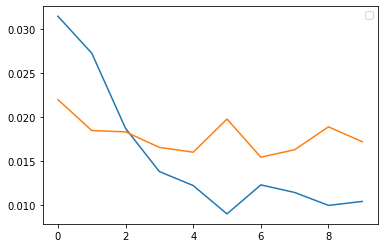

In [21]:
plt.plot(running_loss_history)
plt.plot(validation_running_loss_history)
plt.legend()

No handles with labels found to put in legend.


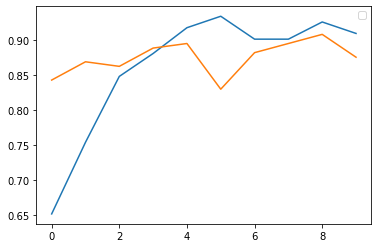

In [22]:
plt.plot(running_accuracy_history)
plt.plot(validation_running_accuracy_history)
plt.legend()

In [23]:
import PIL.ImageOps

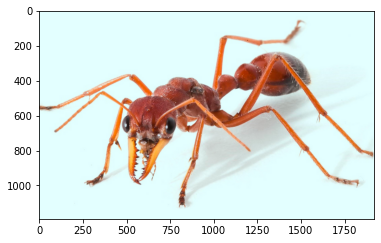

In [24]:
import requests
from PIL import Image

url = 'http://cdn.sci-news.com/images/enlarge5/image_6425e-Giant-Red-Bull-Ant.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

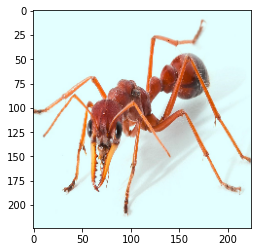

In [25]:
img = transform(img) 
plt.imshow(im_convert(img))

In [26]:

image = img.to(device).unsqueeze(0)
output = model(image)
_, pred = torch.max(output, 1)
print(classes[pred.item()])

ant


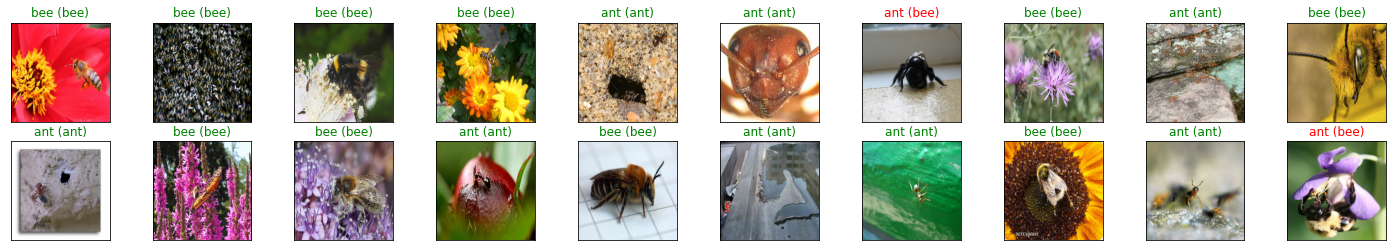

In [27]:
dataiter = iter(validation_data)
images, labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))


In [12]:
model_vgg = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [13]:
for param in model_vgg.features.parameters():
  param.requires_grad=False

In [14]:
model_vgg

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [15]:
n_inputs = model_vgg.classifier[6].in_features
last_layer = nn.Linear(n_inputs, len(classes))
model_vgg.classifier[6] = last_layer

In [16]:
model_vgg.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_vgg.parameters(), lr= 0.0001)

In [25]:

epochs = 10
running_loss_history = []
running_accuracy_history = []
validation_running_loss_history = []
validation_running_accuracy_history = []

for e in range(epochs):
  running_loss=0.
  running_accuracy = 0.
  validation_running_loss = 0.
  validation_running_accuracy = 0.
  for inputs, labels in train_data:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model_vgg(inputs)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)
    running_loss +=loss.item()
    running_accuracy +=torch.sum(preds == labels.data)

  else:

    with torch.no_grad():
      for val_inputs, val_labels in validation_data:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model_vgg(val_inputs)
        val_loss = criterion(val_outputs, val_labels)

        _, val_preds = torch.max(val_outputs, 1)
        validation_running_loss +=val_loss.item()
        validation_running_accuracy += torch.sum(val_preds == val_labels.data)

    epoch_loss = running_loss/len(train_data.dataset)
    epoch_accuracy = running_accuracy.float()/len(train_data.dataset)
    running_loss_history.append(epoch_loss)
    running_accuracy_history.append(epoch_accuracy.cpu().detach().numpy())

    val_epoch_loss = validation_running_loss/len(validation_data.dataset)
    val_epoch_accuracy = validation_running_accuracy/len(validation_data.dataset)
    validation_running_loss_history.append(val_epoch_loss)
    validation_running_accuracy_history.append(val_epoch_accuracy.cpu().detach().numpy())

    print('epoch :', (e+1))
    print('training loss: {:.4f}, accuracy: {:.4f} '.format(epoch_loss, epoch_accuracy.item()))
    print('validation loss: {:.4f}, validation accuracy: {:.4f} '.format(val_epoch_loss, val_epoch_accuracy.item()))

epoch : 1
training loss: 0.0110, accuracy: 0.9098 
validation loss: 0.0184, validation accuracy: 0.9150 
epoch : 2
training loss: 0.0100, accuracy: 0.9262 
validation loss: 0.0183, validation accuracy: 0.9346 
epoch : 3
training loss: 0.0089, accuracy: 0.9385 
validation loss: 0.0173, validation accuracy: 0.9150 
epoch : 4
training loss: 0.0054, accuracy: 0.9549 
validation loss: 0.0338, validation accuracy: 0.8889 
epoch : 5
training loss: 0.0080, accuracy: 0.9221 
validation loss: 0.0277, validation accuracy: 0.9020 
epoch : 6
training loss: 0.0048, accuracy: 0.9713 
validation loss: 0.0279, validation accuracy: 0.9150 
epoch : 7
training loss: 0.0050, accuracy: 0.9713 
validation loss: 0.0421, validation accuracy: 0.9020 
epoch : 8
training loss: 0.0097, accuracy: 0.9713 
validation loss: 0.0330, validation accuracy: 0.9085 
epoch : 9
training loss: 0.0068, accuracy: 0.9385 
validation loss: 0.0412, validation accuracy: 0.9020 
epoch : 10
training loss: 0.0073, accuracy: 0.9549 
val

No handles with labels found to put in legend.


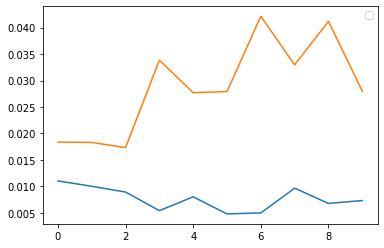

In [28]:
plt.plot(running_loss_history)
plt.plot(validation_running_loss_history)
plt.legend()

No handles with labels found to put in legend.


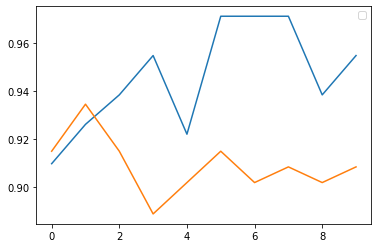

In [29]:
plt.plot(running_accuracy_history)
plt.plot(validation_running_accuracy_history)
plt.legend()

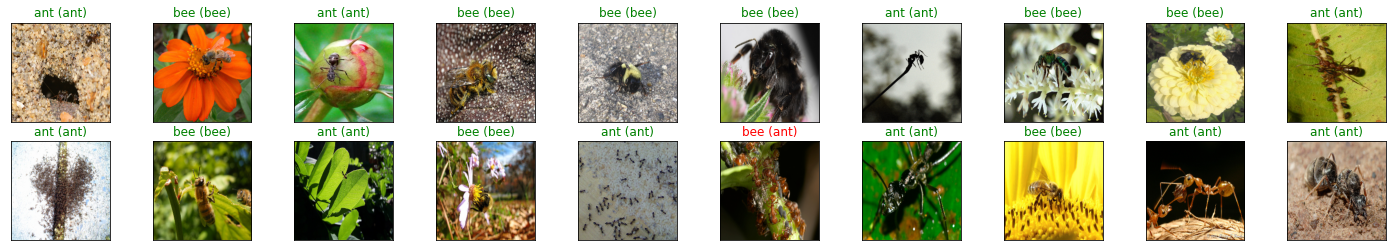

In [30]:
dataiter = iter(validation_data)
images, labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)
output = model_vgg(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))
